In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#load dataset
num_buckets = 15
file_name = "CTMC_QMT_Bucket-" + str(num_buckets) + ".csv"
df = pd.read_csv(file_name)
df.head()

,State,Start_Time,End_Time,Total_Cars
0,0,0,0,0
1,1,0,5,2173
2,0,5,6,282
3,1,6,9,1345
4,2,9,11,1437


In [32]:
#MLE for the lambda parameters
def MLE_lambda_np(df):
    total_time = np.zeros(num_buckets)
    total_occurrences = np.zeros(num_buckets)

    for _, row in df.iterrows():
        state = row['State']
        time_in_state = row["End_Time"] - row["Start_Time"]
        total_time[state] += time_in_state
        total_occurrences[state] += 1

    lambda_parameters = total_occurrences / total_time
    return lambda_parameters

#MLE for the transition matrix
def MLE_transition_matrix_np(df):
    transition_matrix = np.zeros((num_buckets, num_buckets))

    for index, row in df.iterrows():
        if index != len(df) - 1:
            start_state = row['State']
            end_state = df.iloc[index + 1]['State']
            transition_matrix[start_state, end_state] += 1

    for i in range(num_buckets):
        transition_matrix[i] /= np.sum(transition_matrix[i])

    return transition_matrix

[0.30015314 0.88626069 0.82963198 0.81972648 0.67462879 0.68241347
 0.66749585 0.60863679 0.60723004 0.64019021 0.82511924 0.92845118
 0.8637752  0.83767872 0.96068796]
[[0.00000000e+00 4.93328100e-01 1.07535322e-01 3.54003140e-01
  4.27786499e-02 2.35478807e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.33730835e-01 0.00000000e+00 1.12436116e-01 1.66098807e-01
  8.23395798e-02 5.11073254e-03 0.00000000e+00 0.00000000e+00
  2.83929585e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16296863e-01 6.11706197e-01 0.00000000e+00 1.74445295e-01
  3.02218822e-02 1.10941086e-02 2.10405509e-02 2.86916603e-02
  5.35577659e-03 1.14766641e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.02224469e-03 1.57735086e-01 3.50606673e-01 0.00000000e+00
  1.20576340e-01 2.75530839e-02 9.10010111e-03 6.72396360e-02
  1.8

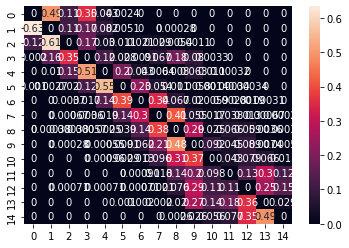

In [33]:
lambda_parameters = MLE_lambda_np(df)
print(lambda_parameters)

transition_matrix = MLE_transition_matrix_np(df)
print(transition_matrix)

#plot transition matrix
sns.heatmap(transition_matrix, annot=True)
plt.show()



In [34]:
#greatest value in the transition matrix
max_val = np.max(transition_matrix)
print(max_val)


0.6337308347529813


In [29]:
#create Q matrix where Qij = lambda_i * Pij if i != j and Qii = -lambda_i
def create_Q(lambda_parameters, transition_matrix):
    Q = np.zeros((num_buckets, num_buckets))
    for i in range(num_buckets):
        for j in range(num_buckets):
            if i != j:
                Q[i, j] = lambda_parameters[i] * transition_matrix[i, j]
            else:
                Q[i, j] = -lambda_parameters[i]
    return Q

#calculate the stationary distribution
def calculate_stationary_distribution(Q):
    Q = Q.T
    Q[-1] = np.ones(10)
    b = np.zeros(10)
    b[-1] = 1
    return np.linalg.solve(Q, b)

Q = create_Q(lambda_parameters, transition_matrix)
stationary_distribution = calculate_stationary_distribution(Q)
print(stationary_distribution)

[0.13829808 0.1226202  0.0572391  0.05792697 0.08771871 0.08286715
 0.08663094 0.07276517 0.07298555 0.22094811]


In [30]:
#find the lowest and highest totals in each bucket
df.groupby("State")["Total_Cars"].agg([min, max])

,min,max
State,,
0,0,1998
1,225,4243
2,450,2923
3,675,8649
4,900,8787
5,1125,8711
6,1350,22305
7,1574,12920
8,1799,16892
